In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv("AB_NYC_2019.csv")
print(len(data))
print(data.dtypes)

48895
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [3]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **EDA: Box plot for outlier detection**

The following box plots are to display the outliers in the dataset.

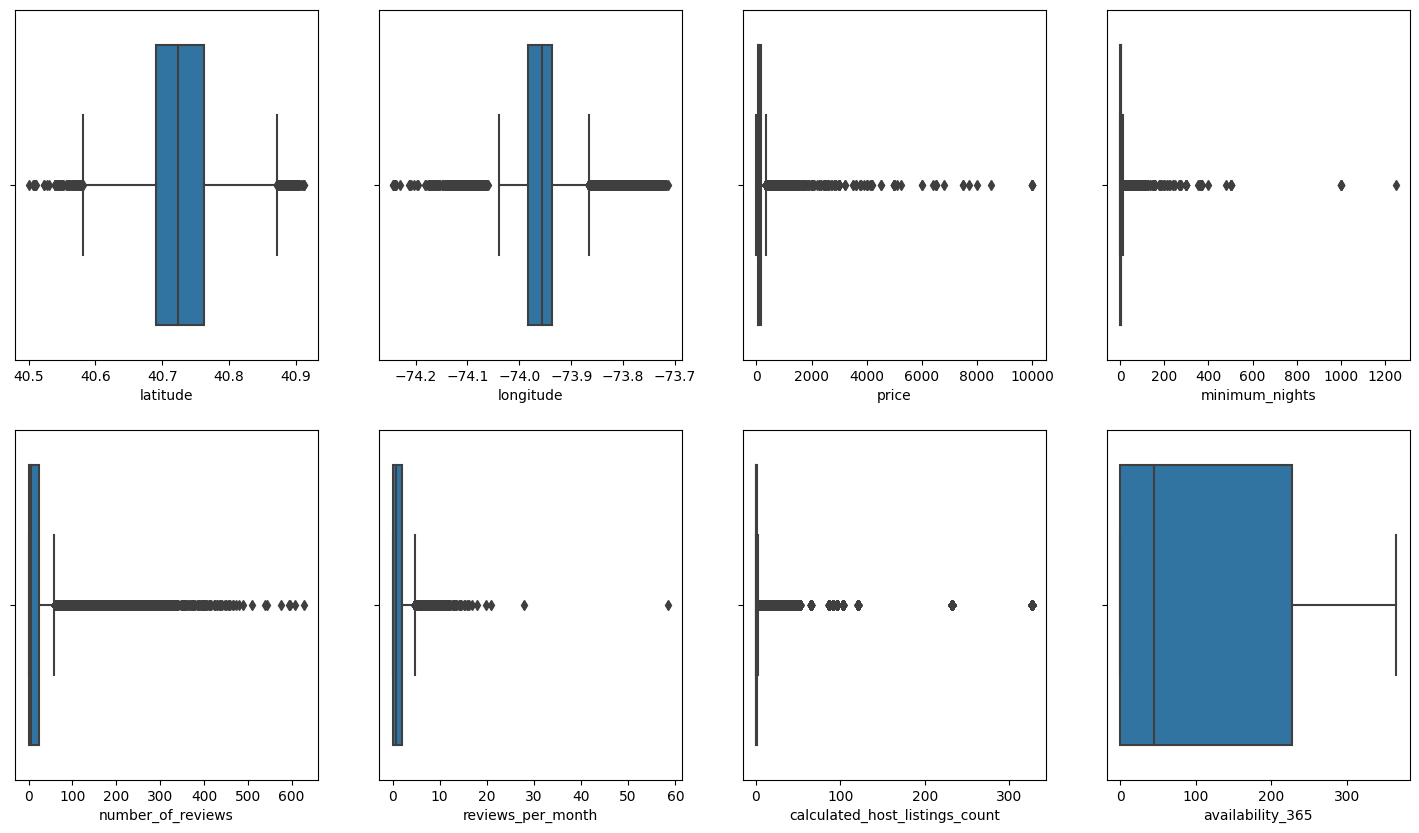

In [5]:
box_plot_columns = ['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

fig, axes = plt.subplots(2, 4, figsize=(18, 10))

for i in range(len(box_plot_columns)):
  sns.boxplot(ax=axes[int(i/4), int(i%4)], data=data, x=data[box_plot_columns[i]])

# **Negatively Correlated Values**
Remove negatively correlated values, in this case it will be id that is going to be removed

<ipython-input-6-d67edd51af12>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


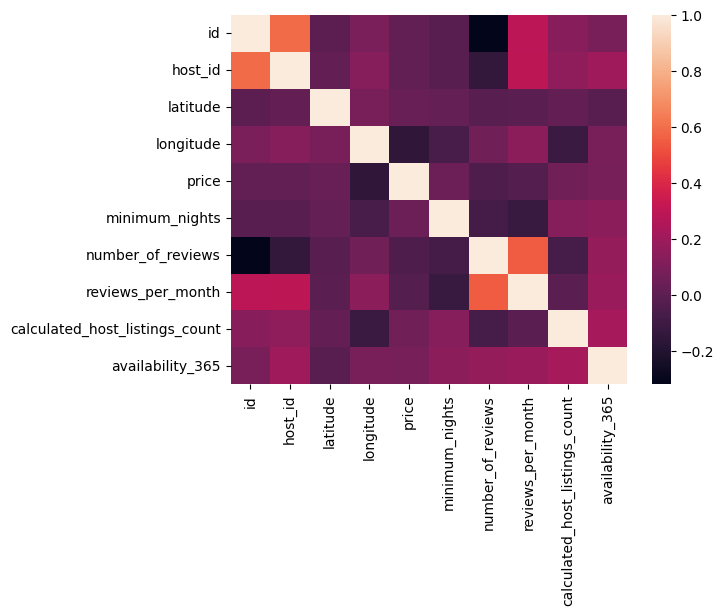

In [6]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix)

threshhold = -.2
negatively_correlated = correlation_matrix[correlation_matrix < threshhold]

data.drop(["id"], axis=1, inplace=True)

# **Removing Unwanted Columns**
Removes columns that we believe to have no use to our examination of the dataset

In [7]:
data.drop(["host_name",'name'], axis="columns", inplace=True)
data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **New Attribute**
Using the attribute "price" and "minimum_nights" to create a new attribute "min_spending" so that we can observe the minimum spending at each airbnb

In [8]:
# Add a new feature for the minimum spending at each airbnb
data["min_spending"] = data["price"] * data["minimum_nights"]

# **Data Type conversion**


In [9]:
#Data Types converison
data['price'] = data['price'].astype(int)
data['minimum_nights'] = data['minimum_nights'].astype(int)
data['number_of_reviews'] = data['number_of_reviews'].astype(int)
data['reviews_per_month'] = data['reviews_per_month'].astype(float)
data['calculated_host_listings_count'] = data['calculated_host_listings_count'].astype(int)
data['availability_365'] = data['availability_365'].astype(int)
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)


# **Date Spliting**
Split date for last_review to year, month and day for further analysis.

In [10]:
data[['year', 'month', 'day']] = data['last_review'].str.split('-', expand=True)

data['year'] = pd.to_numeric(data['year'])
data['month'] = pd.to_numeric(data['month'])
data['day'] = pd.to_numeric(data['day'])

data.drop(['last_review'], axis="columns", inplace=True)

# **Standardize text**

Converts all string attributes to convert any capital letters to its equivalent small letter


In [11]:
data['neighbourhood_group'] =  data['neighbourhood_group'].apply(lambda x: x.lower() if (pd.isna(x) == False) else float("nan"))
data['room_type'] =  data['room_type'].apply(lambda x: x.lower() if (pd.isna(x) == False) else float("nan"))

# **Check for NaN values**

Right now this is only restricted to reviews/month.

Reviews/month: Filled with median

In [12]:
na_columns = data.columns[data.isna().any()]
print(na_columns)

Index(['reviews_per_month', 'year', 'month', 'day'], dtype='object')


In [13]:
# NaN filler for reviews/month
na_filler_reviews = data['reviews_per_month'].median()
data['reviews_per_month'].fillna(na_filler_reviews, inplace = True)

# NaN filler for year
na_filler_year = data['year'].median()
data['year'].fillna(na_filler_year, inplace = True)

# NaN filler for month
na_filler_month = data['month'].median()
data['month'].fillna(na_filler_month, inplace = True)

# NaN filler for day
na_filler_day = data['day'].median()
data['day'].fillna(na_filler_day, inplace = True)

# **Remove outliers**

In [14]:
columns = ['latitude','longitude','price','minimum_nights',
           'number_of_reviews','reviews_per_month',
           'calculated_host_listings_count','availability_365']

for column in columns:
  mean = data[column].mean()
  std = data[column].std()

  data = data[abs((data[column] - mean)/std) < 3]

# **Density plot for price to neighbourhood**

The following is the desnity plot from the price to neighbourhood

<Axes: xlabel='price', ylabel='Density'>

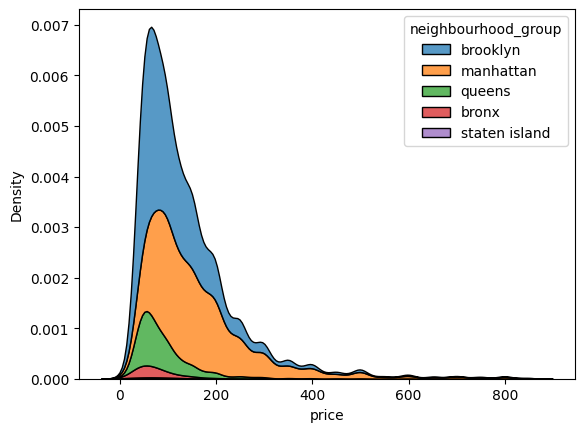

In [15]:
sns.kdeplot(data=data, x="price", hue="neighbourhood_group", multiple="stack")

# **Density plot for price to room type**

The following is the desnity plot from the price to room type

<Axes: xlabel='price', ylabel='Density'>

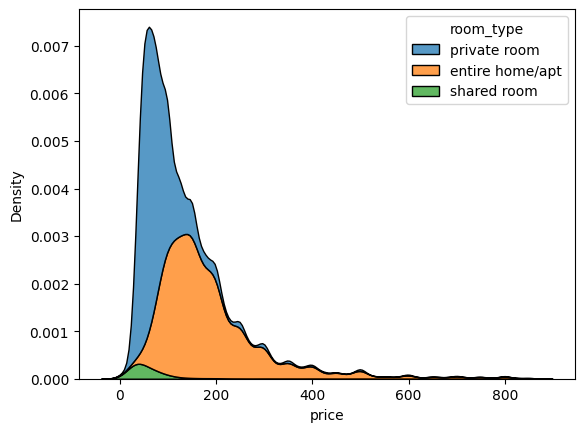

In [16]:
sns.kdeplot(data=data, x="price", hue="room_type", multiple="stack")

# **Normalize Values**

In [17]:
columns = ['latitude','longitude','price','minimum_nights','number_of_reviews',
           'reviews_per_month','calculated_host_listings_count','availability_365',
           'year','month','day']

for column in columns:
  max_bill_length = data[column].max()
  min_bill_length = data[column].min()

  data[column] = (data[column] - min_bill_length)/(max_bill_length - min_bill_length)

#**Frequency Histogram**
The following are histogram for frequency of room type, neighbourhood group and frequency of room type in diffrent neighbourhood group.

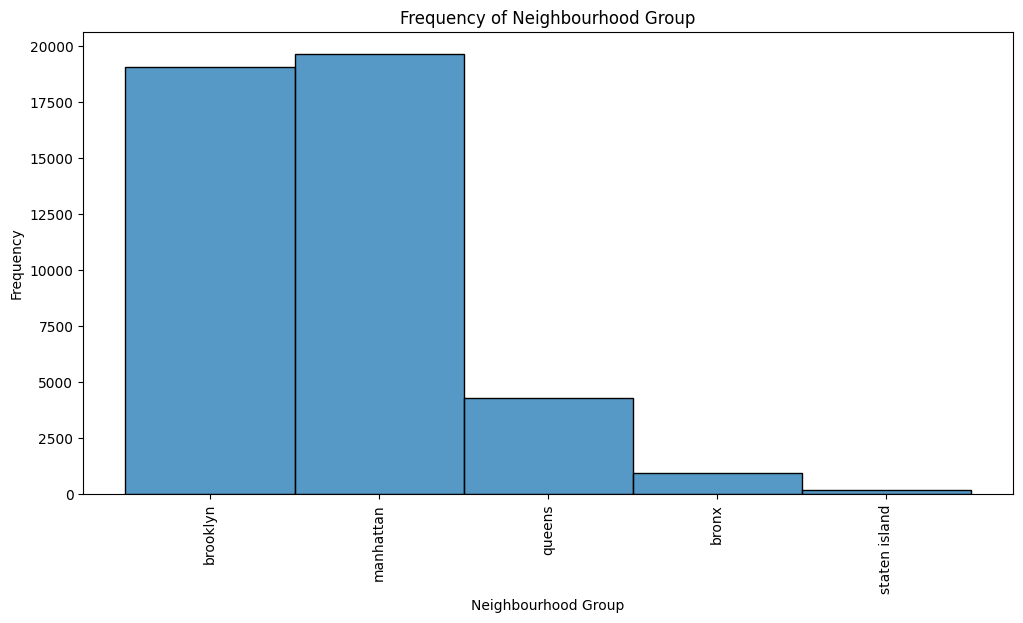

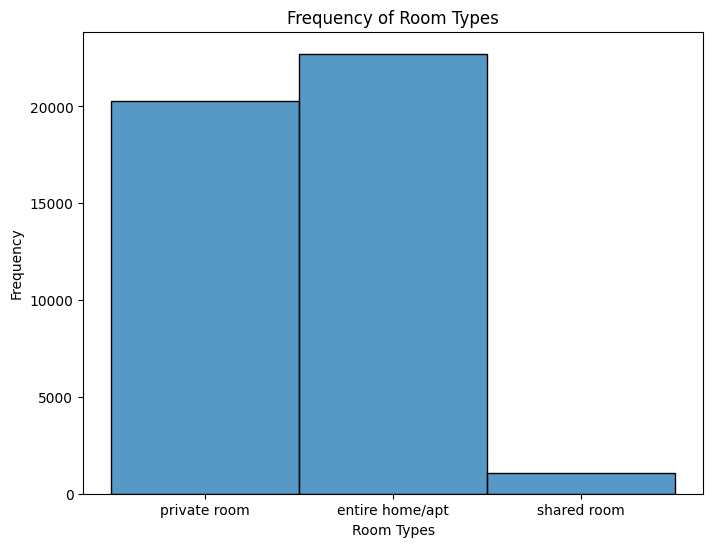

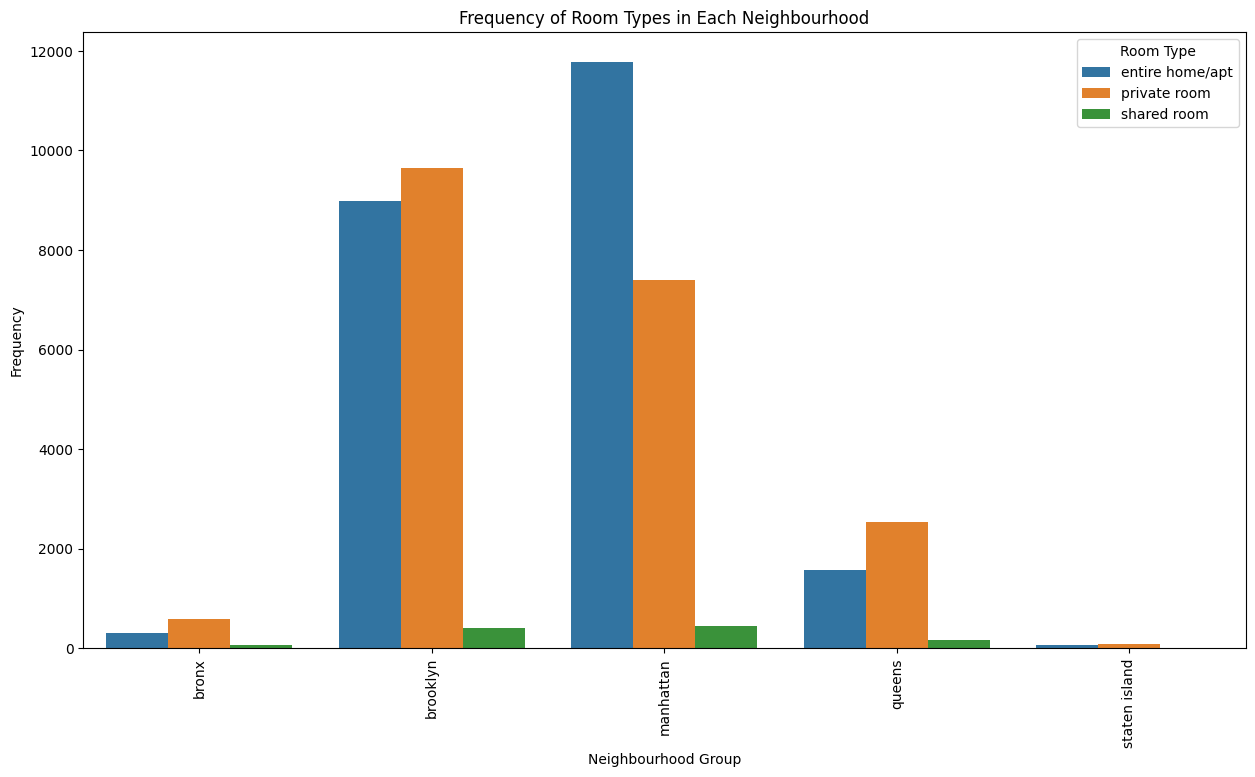

In [18]:
#Frequency of neighbourhood groups
plt.figure(figsize=(12,6))
sns.histplot(data=data, x='neighbourhood_group', bins=30)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Frequency')
plt.title('Frequency of Neighbourhood Group')
plt.show()

#Frequency of room types
plt.figure(figsize=(8,6))
sns.histplot(data=data, x='room_type', bins=3)
plt.xlabel('Room Types')
plt.ylabel('Frequency')
plt.title('Frequency of Room Types')
plt.show()

#Frequency of room types in neighbourhood groups
grouped_df = data.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')
plt.figure(figsize=(15, 8))
sns.barplot(x='neighbourhood_group', y='count', hue='room_type', data=grouped_df)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Frequency')
plt.title('Frequency of Room Types in Each Neighbourhood')
plt.legend(title='Room Type')
plt.show()

# **One hot encoding**

Encoding Neighborhood Group and Room Type into One-hot-encoded labels. Map neighbourhood and host id to integers due to the large number of values

In [19]:
data = pd.get_dummies(data, columns = ['neighbourhood_group','room_type'],dtype = int)

new_categories_neighbourhood = []
neighbourhood = pd.Series(data.neighbourhood, dtype = 'category')
for i in range(len(neighbourhood.cat.categories)):
    new_categories_neighbourhood.append(i)

In [20]:
new_categories_id = []
host_id = pd.Series(data.host_id, dtype = 'category')
for i in range(len(host_id.cat.categories)):
    new_categories_id.append(i)



In [21]:
data['neighbourhood_group'] = neighbourhood.cat.rename_categories(new_categories_neighbourhood)
data['host_id'] = host_id.cat.rename_categories(new_categories_id)

# **Relevancy BarGraph**
Two bargraphs demonstrating the relevancy of neighbouhood and number of reviews and room types with number of reviews

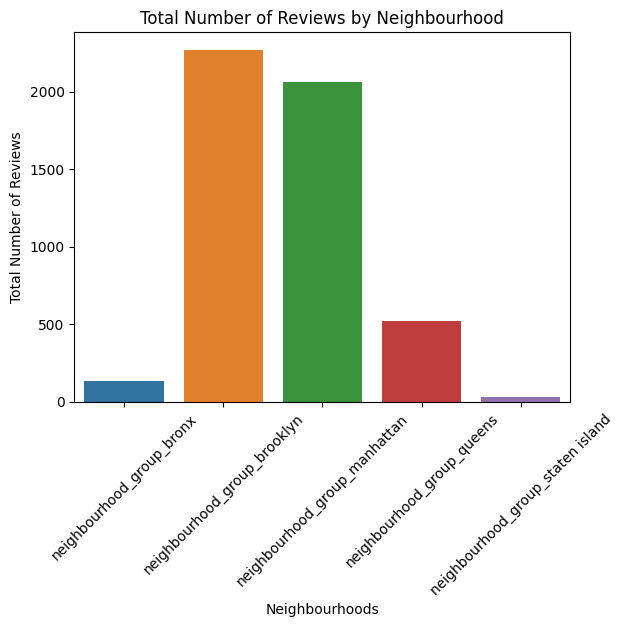

In [22]:
columns = ["neighbourhood_group_bronx", "neighbourhood_group_brooklyn", "neighbourhood_group_manhattan", "neighbourhood_group_queens", "neighbourhood_group_staten island"]

neighbourhood_reviews = {}

for column in columns:
    total_reviews = data[data[column] == 1]['number_of_reviews'].sum()
    neighbourhood_reviews[column] = total_reviews

sns.barplot(x=list(neighbourhood_reviews.keys()), y=list(neighbourhood_reviews.values()))
plt.xlabel('Neighbourhoods')
plt.ylabel('Total Number of Reviews')
plt.title('Total Number of Reviews by Neighbourhood')
plt.xticks(rotation=45)

plt.show()

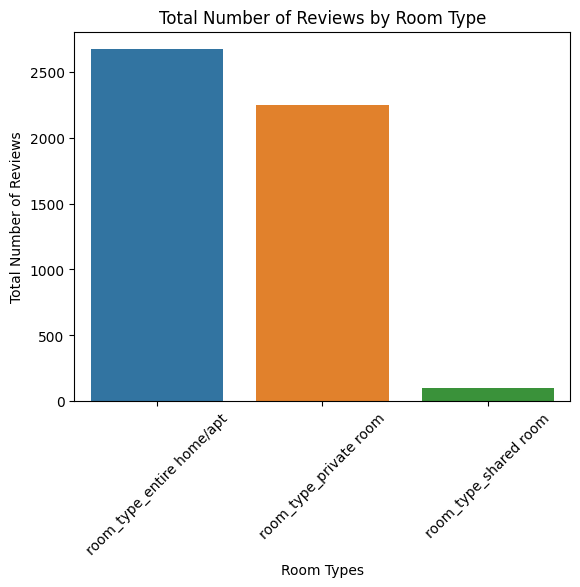

In [23]:
columns = ["room_type_entire home/apt" ,"room_type_private room",	"room_type_shared room"]

neighbourhood_reviews = {}

for column in columns:
    total_reviews = data[data[column] == 1]['number_of_reviews'].sum()
    neighbourhood_reviews[column] = total_reviews

sns.barplot(x=list(neighbourhood_reviews.keys()), y=list(neighbourhood_reviews.values()))
plt.xlabel('Room Types')
plt.ylabel('Total Number of Reviews')
plt.title('Total Number of Reviews by Room Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [ ]:
data.describe()

: 